In [30]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns

In [31]:
import json

with open('fine.json') as f:
    data = json.load(f)


In [4]:
data = data[0]

In [5]:
df = DataFrame (data,columns=['Country','Authority', 'Date', 'Fine', 'Controller', 'QuotedArt', 'Type', 'Summary', 'Info'])

In [6]:
df.Country.unique()

array(['GERMANY', 'ITALY', 'SPAIN', 'GREECE', 'POLAND', 'ROMANIA',
       'BELGIUM', 'ESTONIA', 'FRANCE', 'FINLAND', 'AUSTRIA', 'DENMARK',
       'HUNGARY', 'NORWAY', 'THE NETHERLANDS', 'IRELAND', 'ISLE OF MAN',
       'SWEDEN', 'BULGARIA', 'CROATIA', 'ICELAND', 'CYPRUS',
       'UNITED KINGDOM', 'LATVIA', 'LITHUANIA', 'CZECH REPUBLIC',
       'PORTUGAL', 'MALTA', 'SLOVAKIA'], dtype=object)

In [7]:
df = df[df.Fine != 'Unknown']
df = df[df.Type != 'Unknown']

In [8]:
df[['Fine']] = df[['Fine']].apply(lambda x: x.str.replace('Euro', '').replace(' ', ''))
df[['Fine']] = df[['Fine']].apply(lambda x: x.str.replace(' ', ''))
df[['Fine']] = df[['Fine']].apply(lambda x: x.str.replace(',', '').astype(int))

In [9]:
byCountry = df.groupby(['Country'])['Fine'].sum()

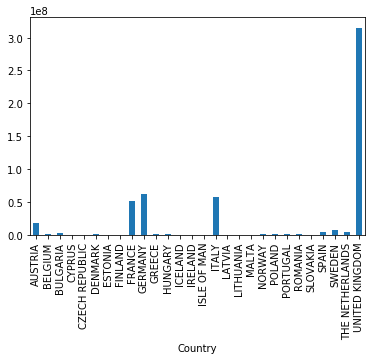

In [10]:
byCountry.plot.bar()

In [54]:
df.Type.unique()

array(['Insufficient legal basis for data processing',
       'Insufficient technical and organisational measures to ensure information security',
       'Non-compliance with general data processing principles',
       'Insufficient fulfilment of information obligations',
       'Insufficient fulfilment of data subjects rights',
       'Insufficient\xa0cooperation with supervisory authority',
       'Insufficient fulfilment of data breach notification obligations',
       'Lack of appointment of data protection officer',
       'Insufficient cooperation with supervisory authority',
       'Insufficient data processing agreement',
       'Insufficient fulfilment of data breach obligations', 'Unknown'],
      dtype=object)

In [56]:
df.to_csv("fine.csv", index=False)

In [64]:
countryByType = df.groupby(["Country", "Type"], as_index = False)['Controller'].count()

In [70]:
heatmap1_data = pd.pivot_table(countryByType, values='Controller', 
                     index=['Country'], 
                     columns='Type')

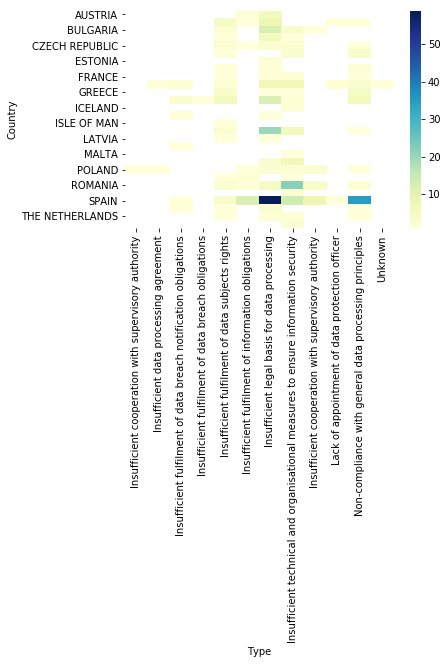

In [71]:
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [13]:
# companies = df.Controller.unique()

# with open('companies.txt', 'w') as f:
#     for item in companies:
#         f.write("%s\n" % item)

# len(df.Controller.unique())

In [17]:
summary = df.Summary
label = df.Type

In [67]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rainyleon/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [92]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer 

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [93]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
nltk_words = list(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def tokenize_sentence(sentence):    
    words_vec = tokenizer.tokenize(sentence) # tokenize
    words_vec = [w.lower() for w in words_vec if not w.lower() in nltk_words and not w.isdigit()] # remove stop words and digits
    words_vec = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in words_vec]
    return " ".join(words_vec)

In [94]:
totalSummaries = []
for stc in summary:
    totalSummaries.append(tokenize_sentence(stc))

In [95]:
len(totalSummaries)

402

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [97]:
vectorizer = TfidfVectorizer()
sum_trans = vectorizer.fit_transform(totalSummaries)

In [98]:
feature_names = vectorizer.get_feature_names()
dense = sum_trans.todense()
denselist = dense.tolist()
summaries_df = pd.DataFrame(denselist, columns=feature_names)

In [100]:
feature_names

['10th',
 '12th',
 '1st',
 '25th',
 '27k',
 '28th',
 '2m',
 '2nd',
 '39m',
 'ab',
 'ability',
 'able',
 'absence',
 'abuse',
 'academic',
 'accept',
 'accesible',
 'access',
 'accessible',
 'accidental',
 'accidentally',
 'accord',
 'accordance',
 'accordingt',
 'account',
 'accountability',
 'accountancy',
 'accounting',
 'accuracy',
 'accurate',
 'accuse',
 'ace',
 'achieve',
 'acknowledge',
 'acquire',
 'act',
 'action',
 'activate',
 'activation',
 'active',
 'activity',
 'actual',
 'actually',
 'add',
 'addendum',
 'addition',
 'additional',
 'additionally',
 'address',
 'adequate',
 'adequately',
 'adherence',
 'adjacent',
 'administration',
 'administrative',
 'administrator',
 'admission',
 'adopt',
 'adresses',
 'adresshandel',
 'advertisement',
 'advertising',
 'adwords',
 'aedp',
 'aegean',
 'aepd',
 'affair',
 'affect',
 'affected',
 'affiliate',
 'affiliation',
 'affinity',
 'affixed',
 'agancy',
 'agany',
 'age',
 'agency',
 'agent',
 'aggravate',
 'agree',
 'agreement',


In [104]:
summaries_df.shape

(402, 1939)